In [2]:
import sys, os, re; sys.path = (["../src/", "../"] if re.match(r'^(\w\:\\)|(/)', os.getcwd()) else [])+ sys.path 

from typing import Any, Optional, List
import asyncio
import nest_asyncio
nest_asyncio.apply()

import qubx
%qubxd dev 

%load_ext autoreload
%autoreload 2

from qubx import lookup, logger
from qubx.core.strategy import IStrategy, StrategyContext
from qubx.impl.ccxt_connector import CCXTConnector
from qubx.utils.runner import get_account_auth

 >  [dev] installing cython rebuilding hook

                   ╻
   ┏┓      ╻       ┃  ┏┓       Quantitative Backtesting Environment 
   ┃┃  ┓┏  ┣┓  ┏┓  ┃  ┏┛       
   ┗┻  ┗┻  ┗┛  ┗   ┃  ┗━       (c) 2024,  ver. Dev
                   ╹       



In [3]:
%load_ext autoreload
%autoreload 2
from strats.teststrat import FlipFlopStrat

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
cc = CCXTConnector('binance', **get_account_auth('binance-mde', './configs/.env'))

2024-04-11 11:53:49.337 [ ℹ️ ] BINANCE loading ...
2024-04-11 11:53:55.519 [ ℹ️ ] Loading account data for Binance
2024-04-11 11:53:55.790 [ ℹ️ ] BINANCE initialized - current time 2024-04-11T08:53:55.790549000
2024-04-11 11:53:55.798 [ ℹ️ ] BINANCE initialized - current time 2024-04-11T08:53:55.798133000


In [17]:
symbols = ['PEPE', 'SHIB', 'XVG', 'BOME', 'CKB', 'GALA', 'LINK'] 
instruments = [lookup.find_instrument('BINANCE', s, 'USDT') for s in symbols]

In [38]:
ctx = StrategyContext(
    FlipFlopStrat(), dict(
        capital_invested=100,
        trading_allowed=False
    ), 
    cc, cc, instruments=instruments,  # type: ignore
    md_subscription=dict(type='ohlc', timeframe='5Min', nback=100),
    trigger=dict(type='bar', delay='-5Sec', timeframe='1Min')
)
S = ctx.strategy

2024-04-11 12:03:47.309 [ ℹ️ ] (StrategyContext) set strategy parameters:
	set capital_invested <- 100
	set trading_allowed <- False


In [ ]:
ctx.start()

In [40]:
pd.DataFrame(cc.acc.positions_report()).T

,Qty,Price,PnL,MktValue
PEPEUSDT,0.0,0.000000,0.00000,0.000000
SHIBUSDT,0.0,0.000000,0.00000,0.000000
XVGUSDT,0.0,0.000000,0.00000,0.000000
BOMEUSDT,2521.0,0.013098,-0.17647,32.843588
CKBUSDT,935.0,0.035291,-3.87090,29.126185
GALAUSDT,565.0,0.058350,1.27125,34.239000
LINKUSDT,3.0,17.582000,-0.15300,52.593000


In [41]:
ctx.get_capital()

16.650958439999997

2024-04-11 12:03:55.033 [ ℹ️ ] 2024-04-11T09:03:55.033723000 -> TriggerEvent(time=numpy.datetime64('2024-04-11T09:03:55.033723000'), type='bar', instrument='PEPEUSDT', data={o:0.000007 | h:0.000007 | l:0.000007 | c:0.000007 | v:209472.276220})
2024-04-11 12:03:55.042 [ ℹ️ ] 
>>> to close: ['BOMEUSDT', 'CKBUSDT', 'GALAUSDT', 'LINKUSDT']
>>> to open: ['PEPEUSDT', 'SHIBUSDT', 'XVGUSDT'] | 33.0 per symbol
2024-04-11 12:03:55.046 [ ℹ️ ] Positions to process for 100.00 USDT (148.73 will be released from closing ['BOMEUSDT', 'CKBUSDT', 'GALAUSDT', 'LINKUSDT']):
╭────────────────────────────┬────────┬───────┬────────┬────────┬─────────────┬─────────────┬────────╮
│                            │   BOME │   CKB │   GALA │   LINK │        PEPE │        SHIB │    XVG │
├────────────────────────────┼────────┼───────┼────────┼────────┼─────────────┼─────────────┼────────┤
│ 2024-04-11 09:03:55.043476 │      0 │     0 │      0 │      0 │ 4.58971e+06 │ 1.18068e+06 │ 3554.5 │
╰──────────────────────────

In [24]:
# ctx.trade('LINKUSDT', 3)

2024-04-11 11:58:38.439 [ ℹ️ ] (StrategyContext) sending market buy for 3.0 of LINKUSDT ...
2024-04-11 11:58:38.696 [ ℹ️ ] (CCXTSyncTradingConnector) New order [5060847893] MARKET BUY 3.0 of LINKUSDT @ 17.582 (GTC) [CLOSED]


Order(id='5060847893', type='MARKET', symbol='LINKUSDT', time=Timestamp('2024-04-11 08:58:38.734000'), quantity=3.0, price=17.582, side='BUY', status='CLOSED', time_in_force='GTC', client_id='FlipFlopStrat_LINKUSDT_17128258920', cost=52.746)

In [44]:
ctx.stop()
cc.close()

2024-04-11 12:05:03.405 [ ℹ️ ] > test is stopped
2024-04-11 12:05:03.405 [ ℹ️ ] (StrategyContext) Market data processing finished
2024-04-11 12:05:03.405 [ ℹ️ ] (StrategyContext) Market data processing finished


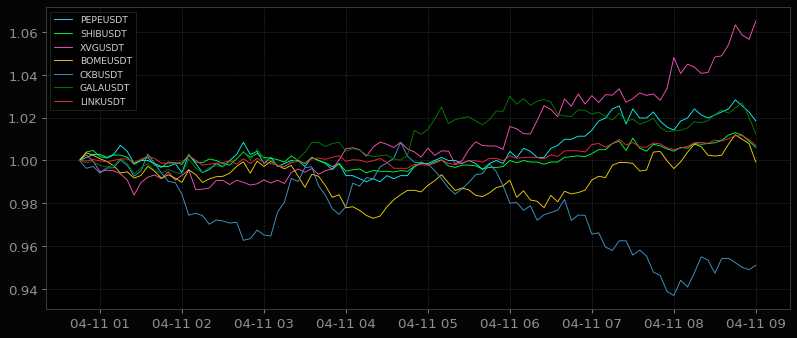

2024-04-11 12:04:56.021 [ ℹ️ ] 2024-04-11T09:04:56.021858000 -> TriggerEvent(time=numpy.datetime64('2024-04-11T09:04:56.021858000'), type='bar', instrument='BOMEUSDT', data={o:0.013117 | h:0.013126 | l:0.012990 | c:0.013007 | v:758539.911242})
2024-04-11 12:04:56.028 [ ℹ️ ] 
>>> to close: ['BOMEUSDT', 'CKBUSDT', 'GALAUSDT', 'LINKUSDT']
>>> to open: ['PEPEUSDT', 'SHIBUSDT', 'XVGUSDT'] | 33.0 per symbol
2024-04-11 12:04:56.033 [ ℹ️ ] Positions to process for 100.00 USDT (148.59 will be released from closing ['BOMEUSDT', 'CKBUSDT', 'GALAUSDT', 'LINKUSDT']):
╭────────────────────────────┬────────┬───────┬────────┬────────┬─────────────┬─────────────┬─────────╮
│                            │   BOME │   CKB │   GALA │   LINK │        PEPE │        SHIB │     XVG │
├────────────────────────────┼────────┼───────┼────────┼────────┼─────────────┼─────────────┼─────────┤
│ 2024-04-11 09:04:56.030178 │      0 │     0 │      0 │      0 │ 4.58971e+06 │ 1.18068e+06 │ 3548.01 │
╰──────────────────────

In [43]:
N = lambda x: x / x.iloc[0]
for s, hh in S.ohlcs('5Min').items():
    plt.plot(N(hh.close), label=s)
plt.legend()